In [1]:
import os
import matplotlib.pyplot as plt
import itertools
import pickle
import imageio
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [2]:
folder = './resultcheck/'
dlossimage = folder + 'dlossimage.png'
glossimage = folder + 'glossimage.png'
genimage = folder + 'output/'
if not os.path.exists(folder):
    os.makedirs(folder)
if not os.path.exists(genimage):
    os.makedirs(genimage)
    

In [3]:
# G(z)
class generator(nn.Module):
    # initializers
    def __init__(self, input_size=32, n_class = 10):
        super(generator, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.fc2 = nn.Linear(self.fc1.out_features, 512)
        self.fc3 = nn.Linear(self.fc2.out_features, 1024)
        self.fc4 = nn.Linear(self.fc3.out_features, n_class)

    # forward method
    def forward(self, input):
        x = F.leaky_relu(self.fc1(input), 0.2)
        x = F.leaky_relu(self.fc2(x), 0.2)
        x = F.leaky_relu(self.fc3(x), 0.2)
        x = F.tanh(self.fc4(x))

        return x

In [4]:
class discriminator(nn.Module):
    # initializers
    def __init__(self, input_size=32, n_class=10):
        super(discriminator, self).__init__()
        self.fc1 = nn.Linear(input_size, 1024)
        self.fc2 = nn.Linear(self.fc1.out_features, 512)
        self.fc3 = nn.Linear(self.fc2.out_features, 256)
        self.fc4 = nn.Linear(self.fc3.out_features, n_class)

    # forward method
    def forward(self, input):
        x = F.leaky_relu(self.fc1(input), 0.2)
        x = F.dropout(x, 0.3)
        x = F.leaky_relu(self.fc2(x), 0.2)
        x = F.dropout(x, 0.3)
        x = F.leaky_relu(self.fc3(x), 0.2)
        x = F.dropout(x, 0.3)
        x = F.sigmoid(self.fc4(x))

        return x


In [5]:
print discriminator()
print generator()

discriminator (
  (fc1): Linear (32 -> 1024)
  (fc2): Linear (1024 -> 512)
  (fc3): Linear (512 -> 256)
  (fc4): Linear (256 -> 10)
)
generator (
  (fc1): Linear (32 -> 256)
  (fc2): Linear (256 -> 512)
  (fc3): Linear (512 -> 1024)
  (fc4): Linear (1024 -> 10)
)


In [6]:
z = torch.randn((5 * 5, 100))    # fixed noise
z = Variable(z.cuda(), volatile=True)

In [7]:
batch_size = 128
lr = 0.0002
train_epoch = 100


In [8]:
# data_loader
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('/home/daiict/Desktop/udit/C-GAN./data' ,train=True, download= True,
                       transform = transform),batch_size=batch_size, shuffle=True)

In [9]:
# network
G = generator(input_size=100, n_class=28*28)
D = discriminator(input_size=28*28, n_class=1)
G.cuda()
D.cuda()

discriminator (
  (fc1): Linear (784 -> 1024)
  (fc2): Linear (1024 -> 512)
  (fc3): Linear (512 -> 256)
  (fc4): Linear (256 -> 1)
)

In [10]:
# Binary Cross Entropy loss
BCE_loss = nn.BCELoss()
BCE_loss = BCE_loss.cuda()

# Adam optimizer
G_optimizer = optim.Adam(G.parameters(), lr=lr)
D_optimizer = optim.Adam(D.parameters(), lr=lr)

In [11]:
def as_np(x):
    return x.cpu().data.numpy()

In [12]:
dloss = []
gloss = []
display_interval = 1000
iters = 0

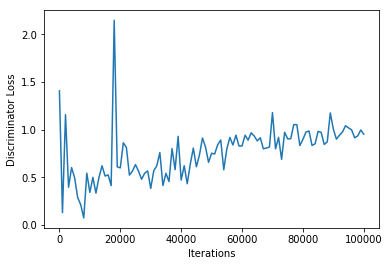

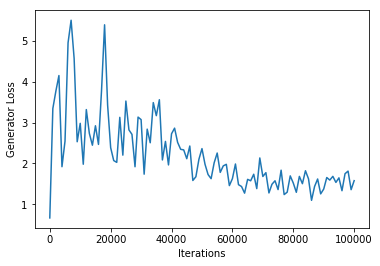

epoch 0 Discriminator loss is 0 and Generator loss is 1


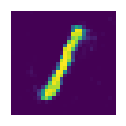

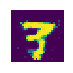

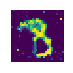

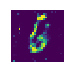

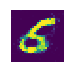

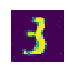

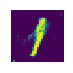

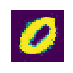

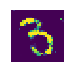

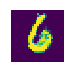

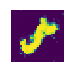

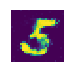

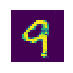

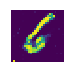

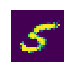

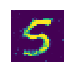

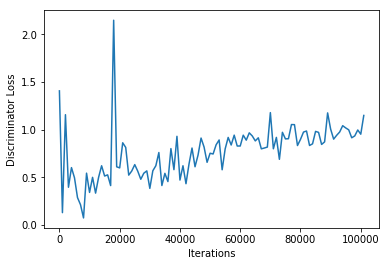

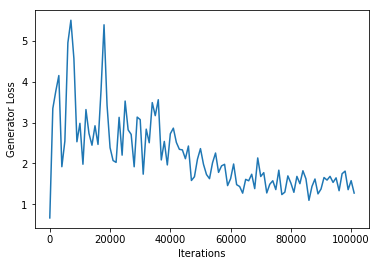

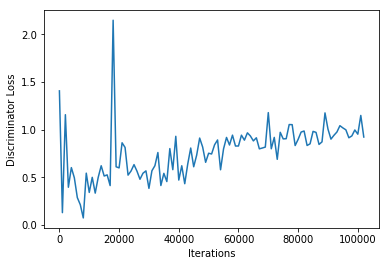

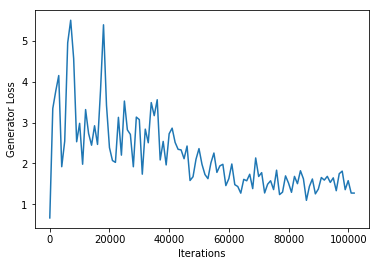

epoch 2 Discriminator loss is 1 and Generator loss is 1


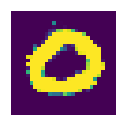

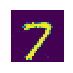

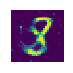

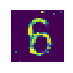

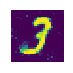

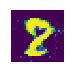

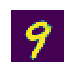

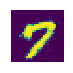

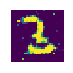

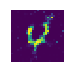

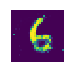

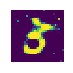

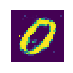

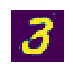

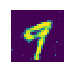

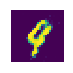

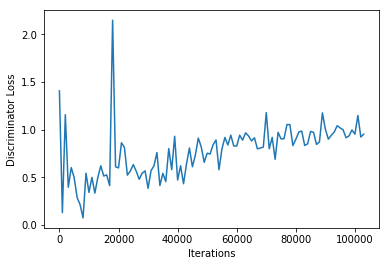

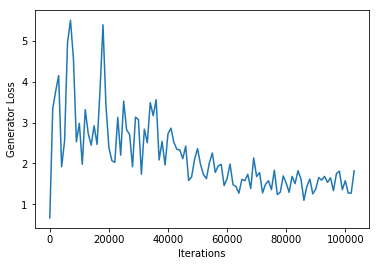

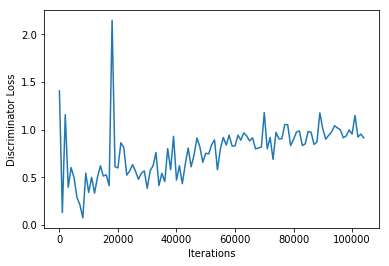

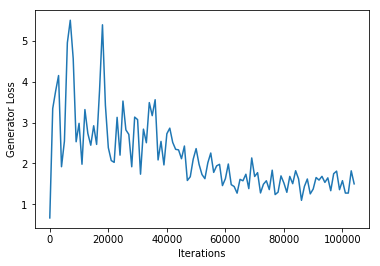

epoch 4 Discriminator loss is 1 and Generator loss is 1


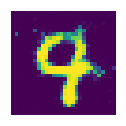

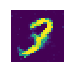

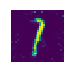

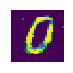

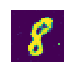

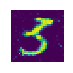

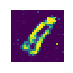

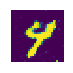

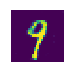

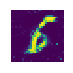

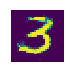

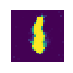

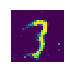

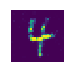

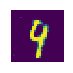

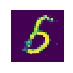

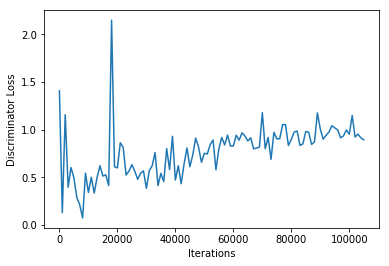

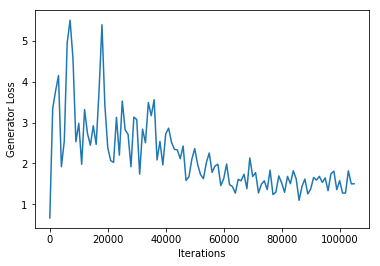

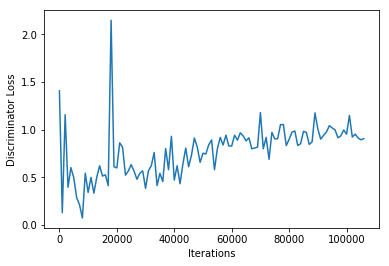

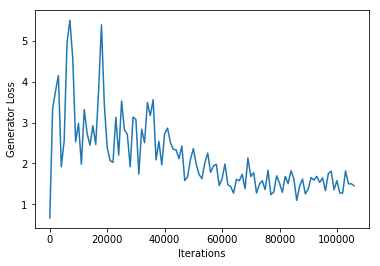

epoch 6 Discriminator loss is 0 and Generator loss is 1


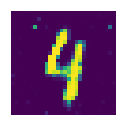

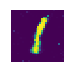

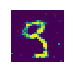

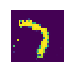

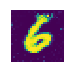

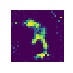

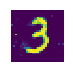

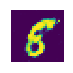

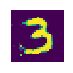

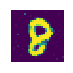

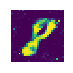

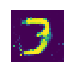

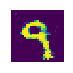

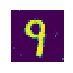

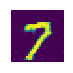

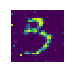

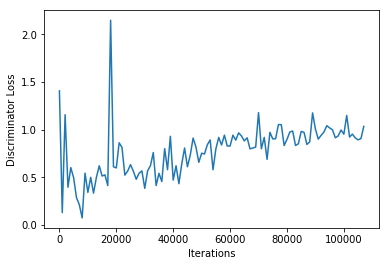

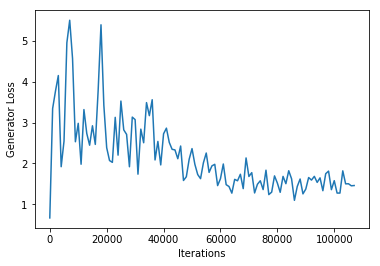

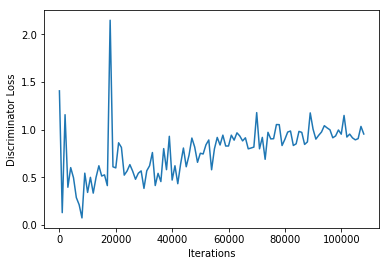

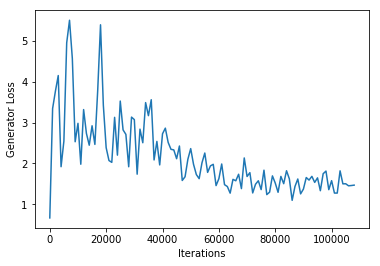

epoch 8 Discriminator loss is 0 and Generator loss is 1


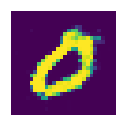

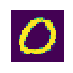

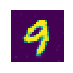

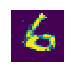

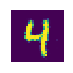

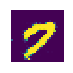

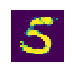

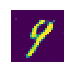

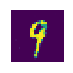

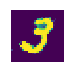

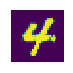

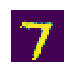

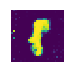

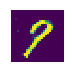

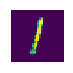

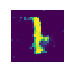

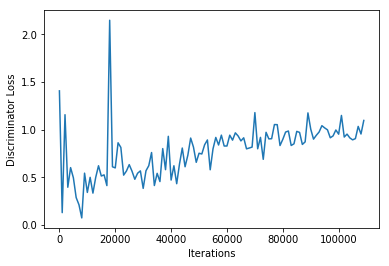

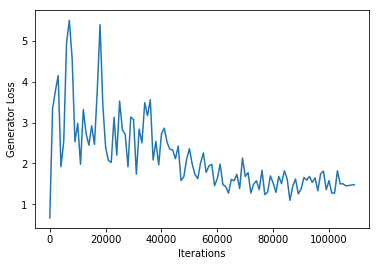

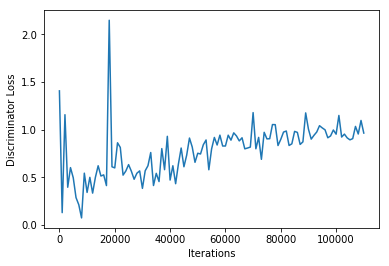

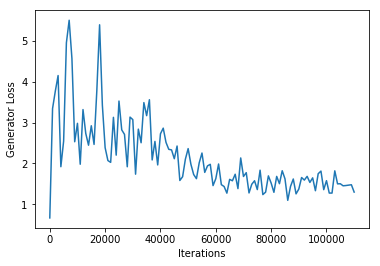

epoch 10 Discriminator loss is 0 and Generator loss is 1


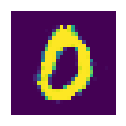

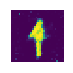

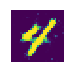

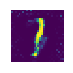

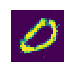

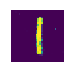

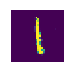

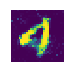

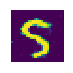

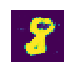

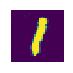

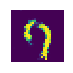

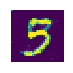

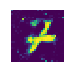

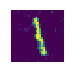

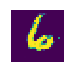

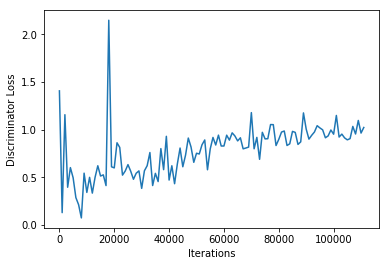

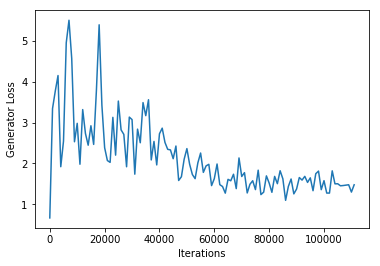

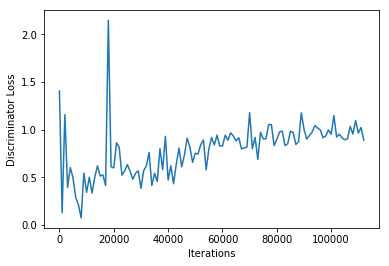

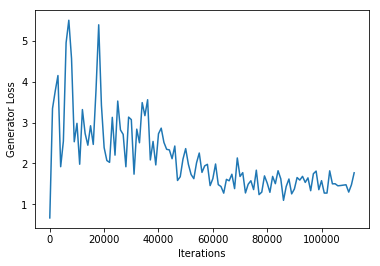

epoch 12 Discriminator loss is 0 and Generator loss is 1


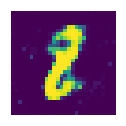

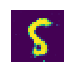

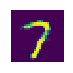

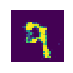

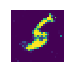

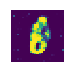

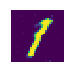

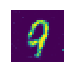

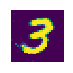

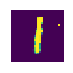

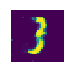

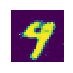

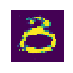

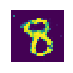

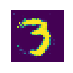

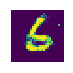

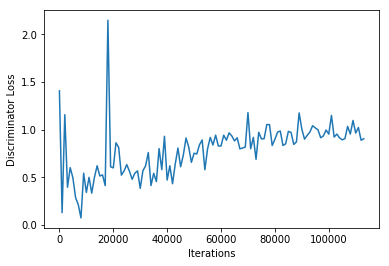

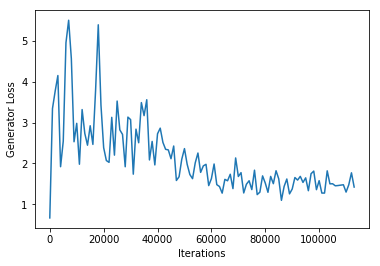

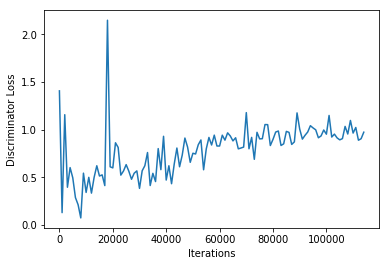

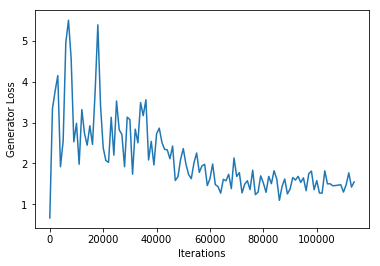

epoch 14 Discriminator loss is 0 and Generator loss is 1


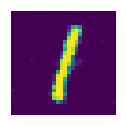

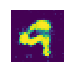

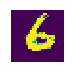

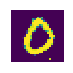

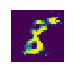

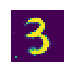

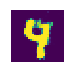

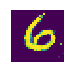

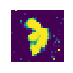

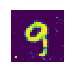

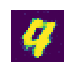

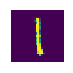

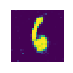

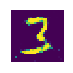

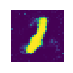

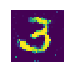

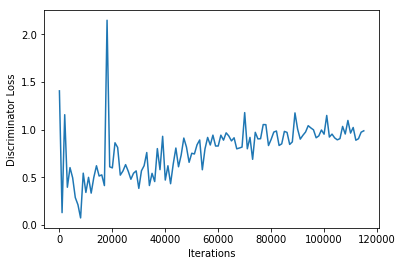

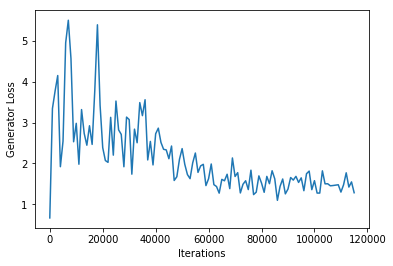

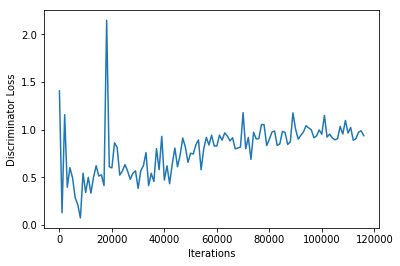

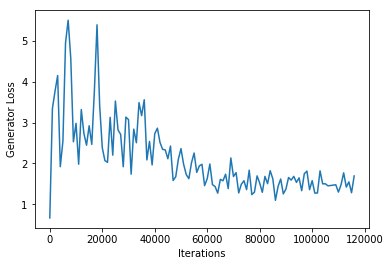

epoch 16 Discriminator loss is 0 and Generator loss is 1


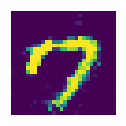

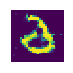

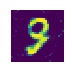

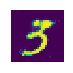

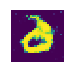

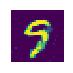

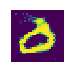

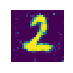

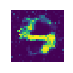

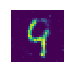

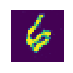

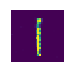

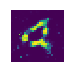

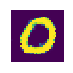

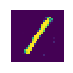

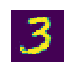

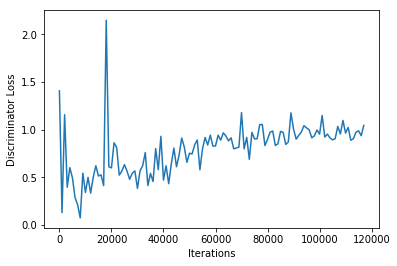

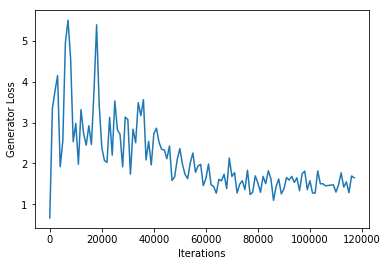

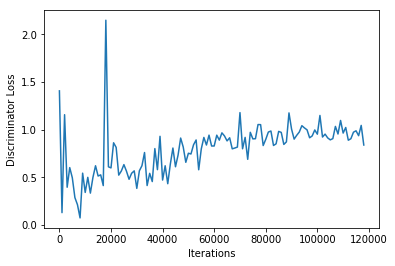

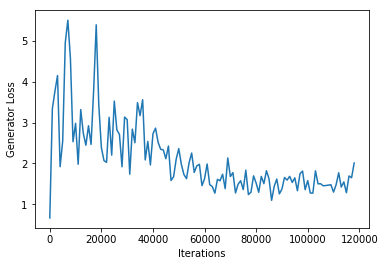

epoch 18 Discriminator loss is 1 and Generator loss is 1


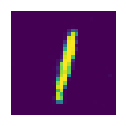

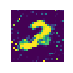

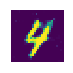

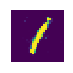

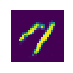

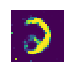

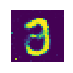

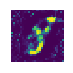

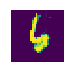

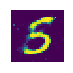

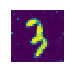

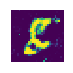

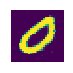

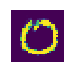

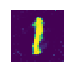

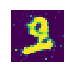

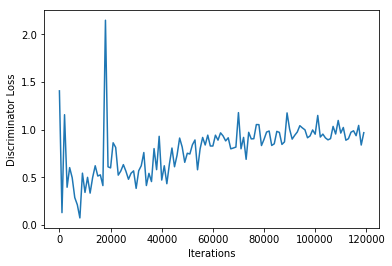

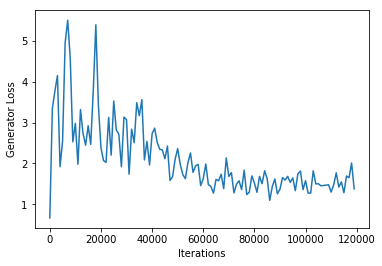

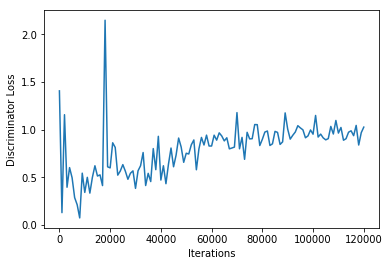

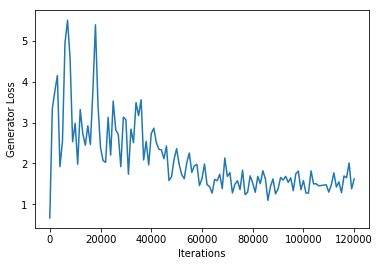

epoch 20 Discriminator loss is 0 and Generator loss is 1


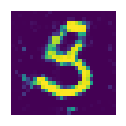

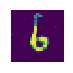

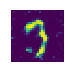

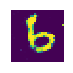

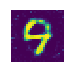

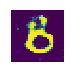

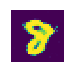

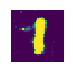

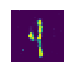

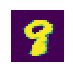

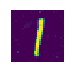

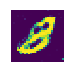

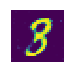

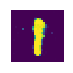

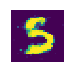

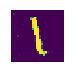

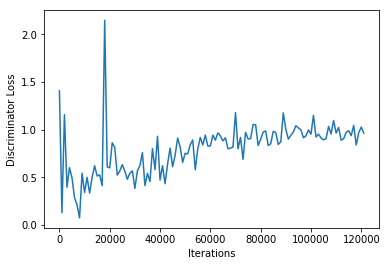

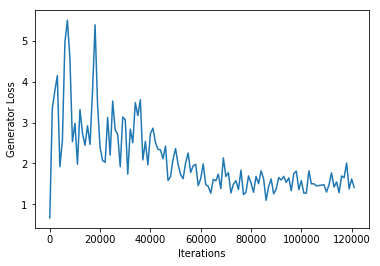

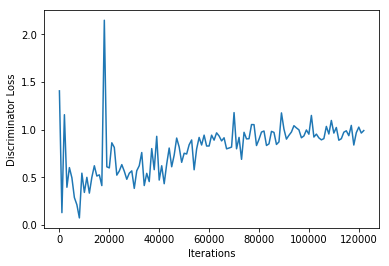

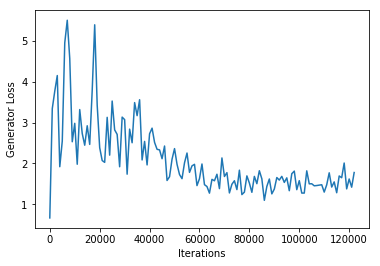

epoch 22 Discriminator loss is 0 and Generator loss is 1


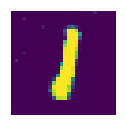

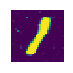

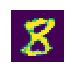

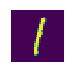

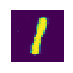

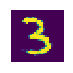

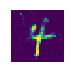

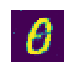

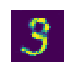

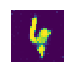

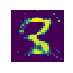

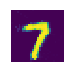

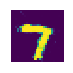

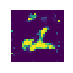

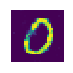

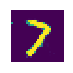

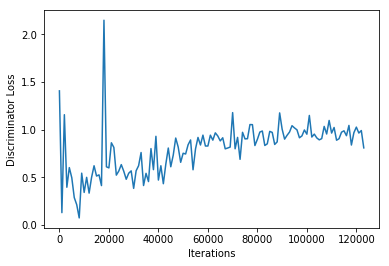

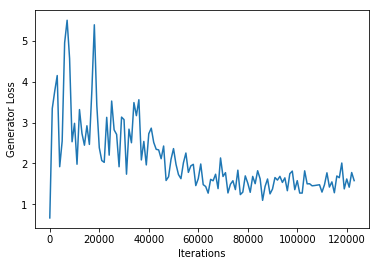

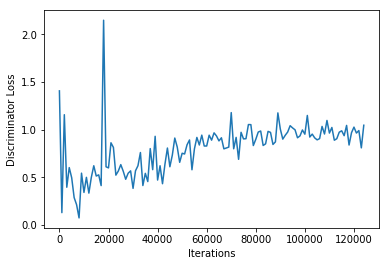

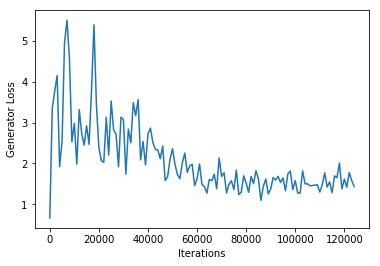

epoch 24 Discriminator loss is 0 and Generator loss is 1


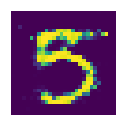

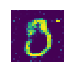

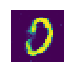

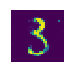

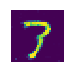

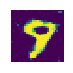

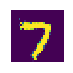

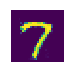

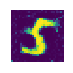

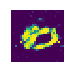

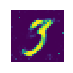

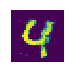

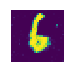

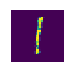

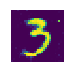

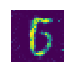

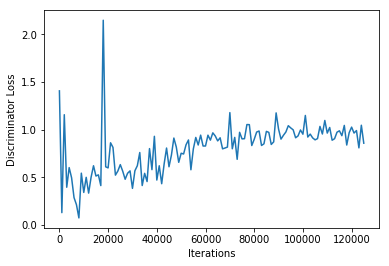

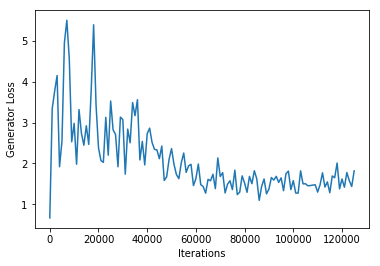

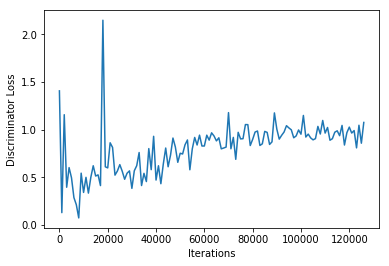

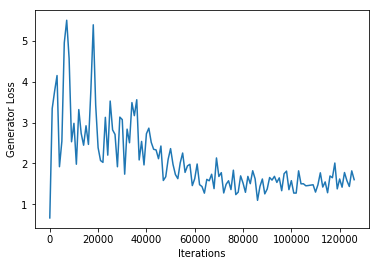

epoch 26 Discriminator loss is 1 and Generator loss is 1


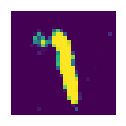

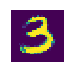

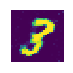

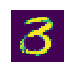

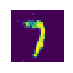

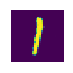

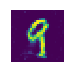

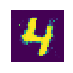

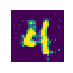

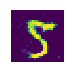

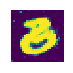

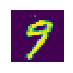

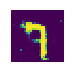

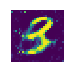

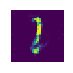

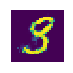

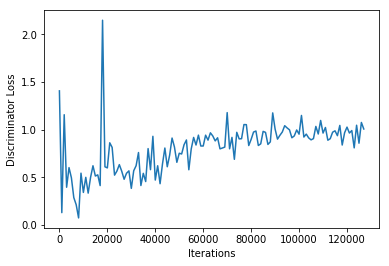

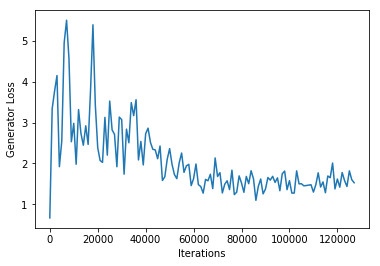

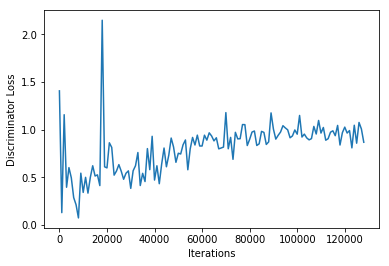

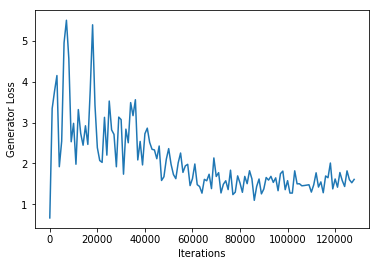

epoch 28 Discriminator loss is 1 and Generator loss is 1


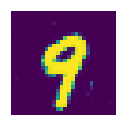

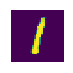

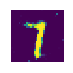

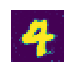

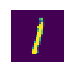

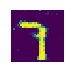

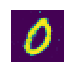

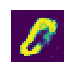

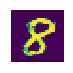

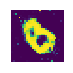

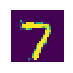

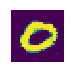

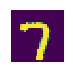

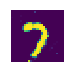

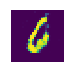

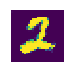

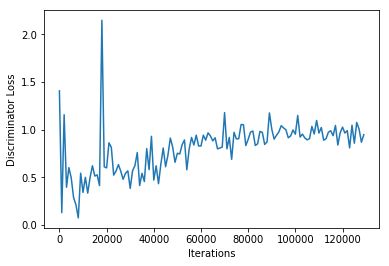

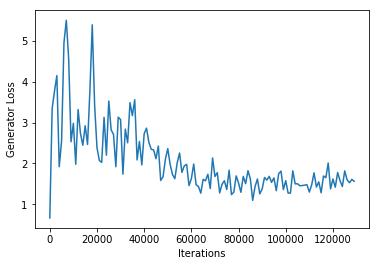

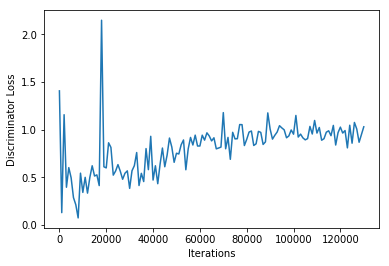

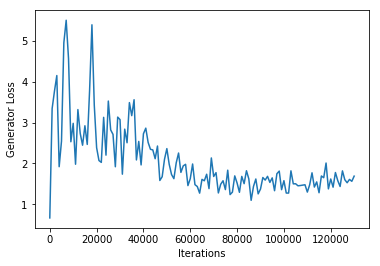

epoch 30 Discriminator loss is 0 and Generator loss is 1


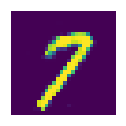

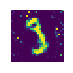

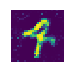

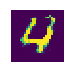

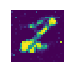

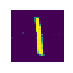

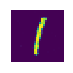

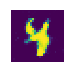

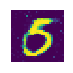

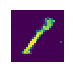

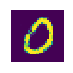

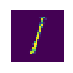

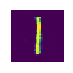

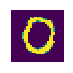

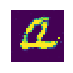

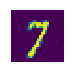

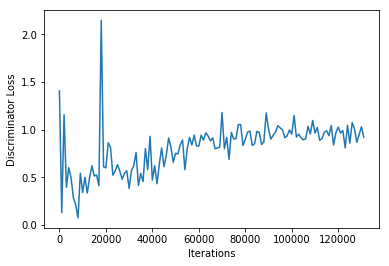

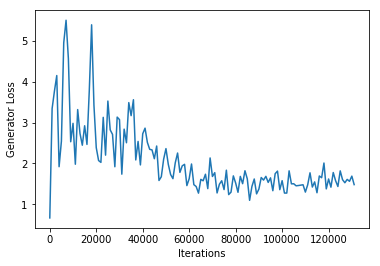

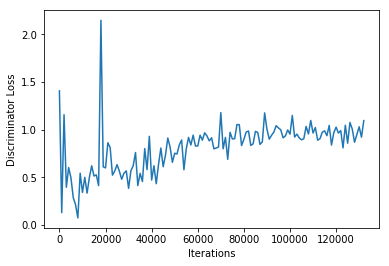

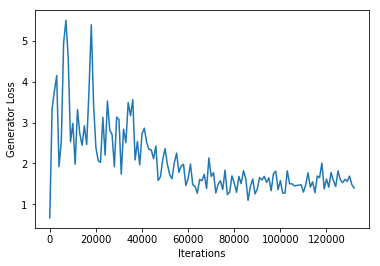

epoch 32 Discriminator loss is 1 and Generator loss is 1


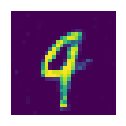

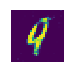

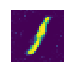

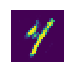

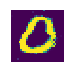

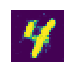

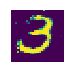

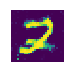

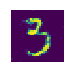

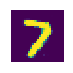

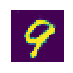

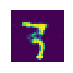

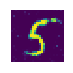

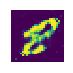

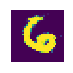

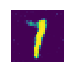

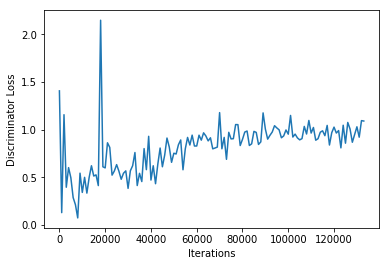

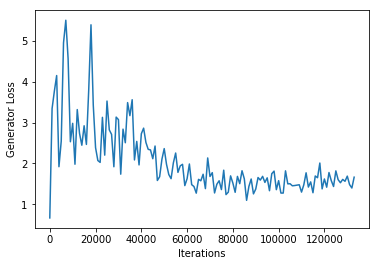

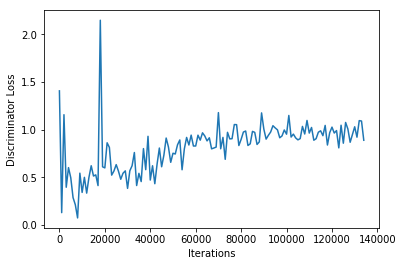

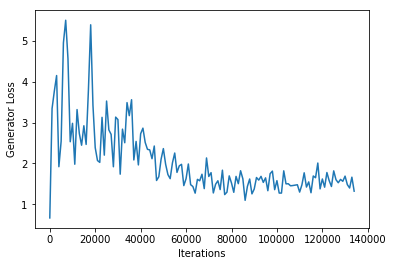

epoch 34 Discriminator loss is 0 and Generator loss is 1


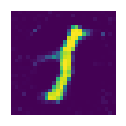

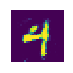

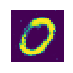

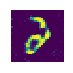

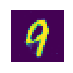

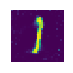

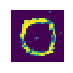

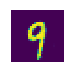

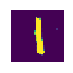

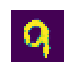

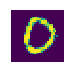

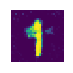

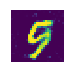

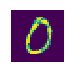

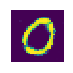

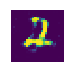

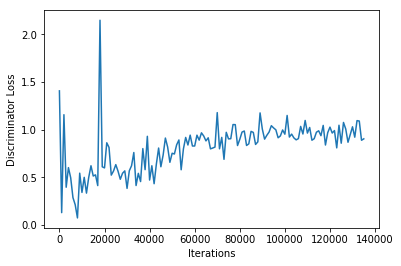

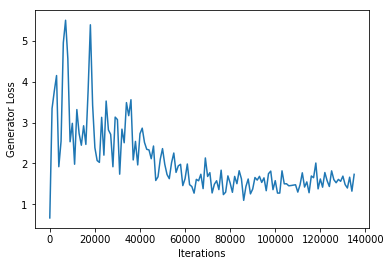

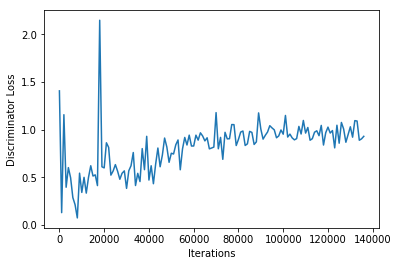

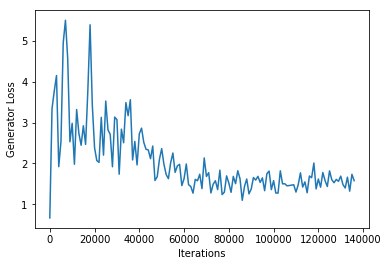

epoch 36 Discriminator loss is 1 and Generator loss is 1


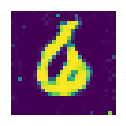

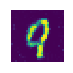

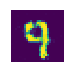

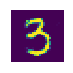

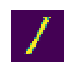

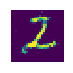

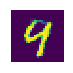

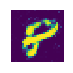

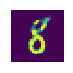

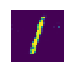

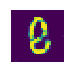

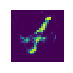

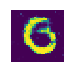

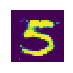

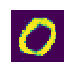

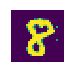

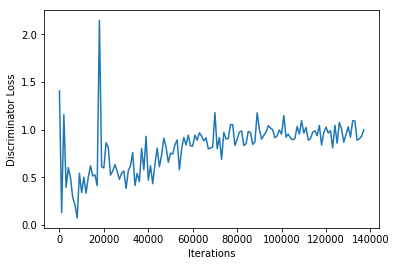

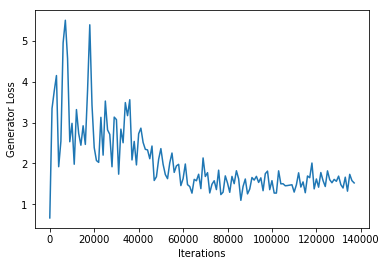

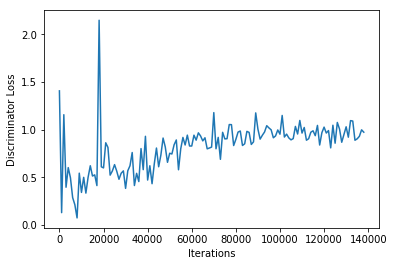

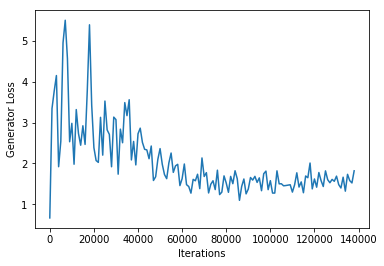

epoch 38 Discriminator loss is 0 and Generator loss is 1


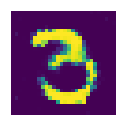

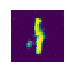

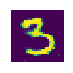

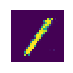

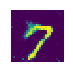

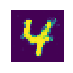

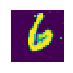

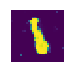

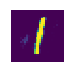

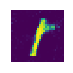

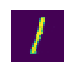

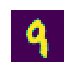

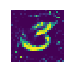

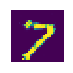

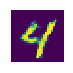

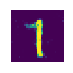

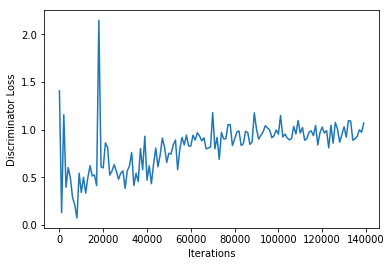

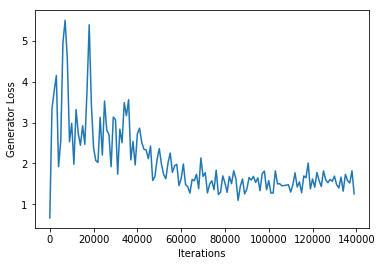

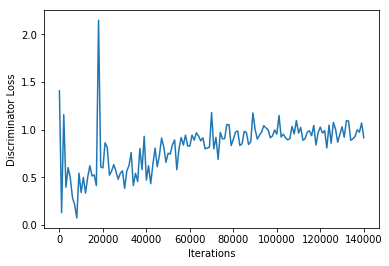

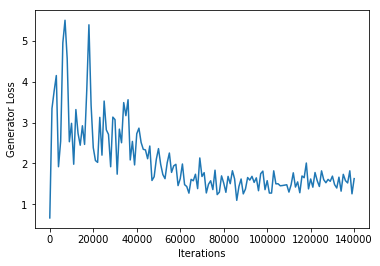

epoch 40 Discriminator loss is 0 and Generator loss is 1


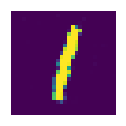

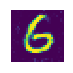

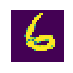

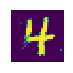

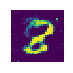

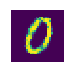

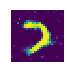

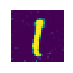

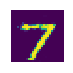

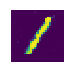

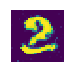

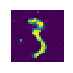

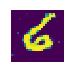

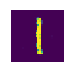

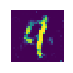

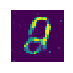

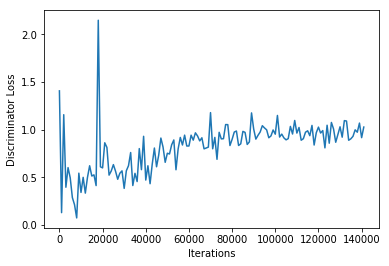

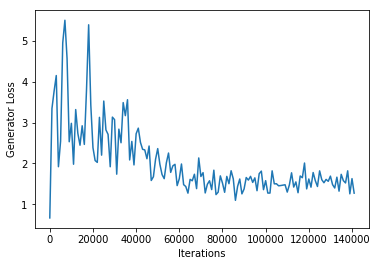

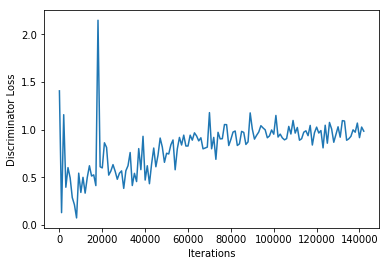

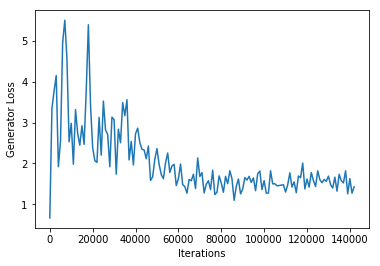

epoch 42 Discriminator loss is 0 and Generator loss is 1


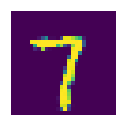

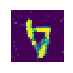

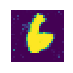

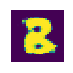

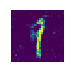

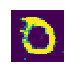

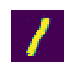

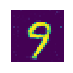

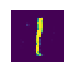

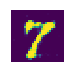

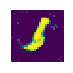

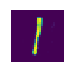

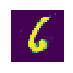

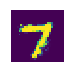

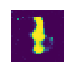

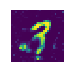

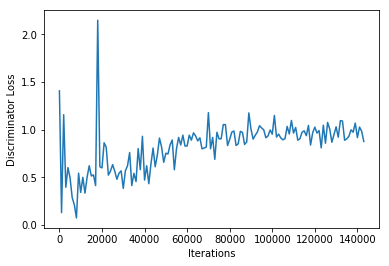

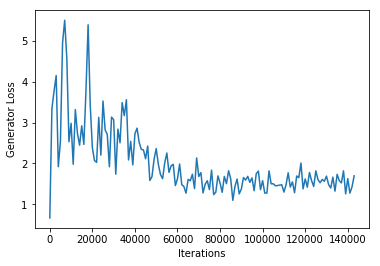

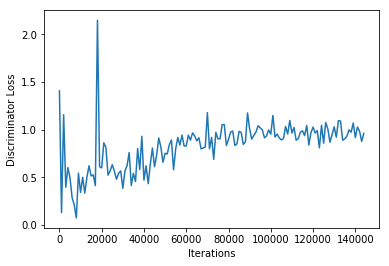

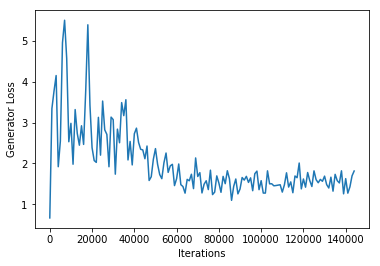

epoch 44 Discriminator loss is 0 and Generator loss is 1


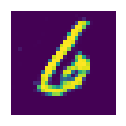

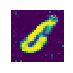

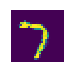

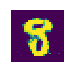

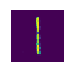

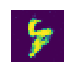

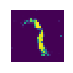

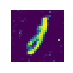

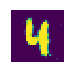

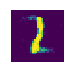

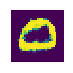

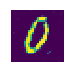

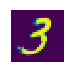

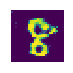

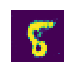

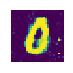

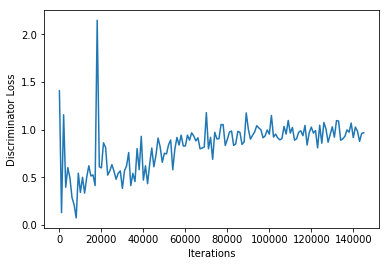

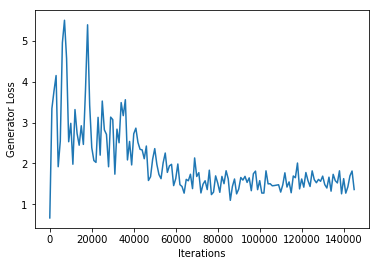

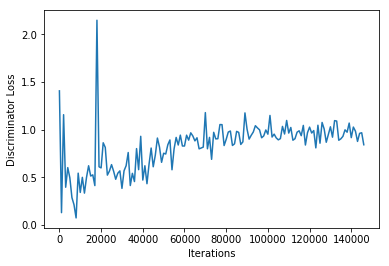

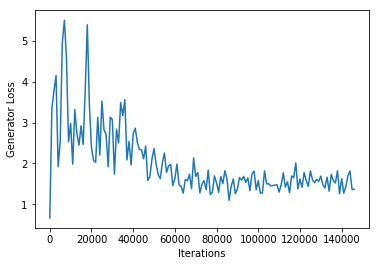

epoch 46 Discriminator loss is 0 and Generator loss is 1


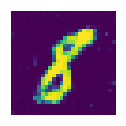

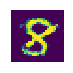

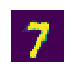

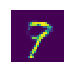

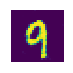

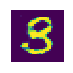

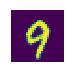

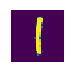

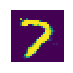

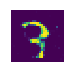

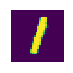

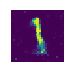

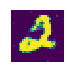

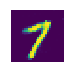

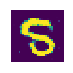

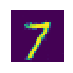

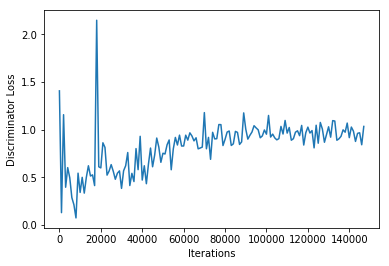

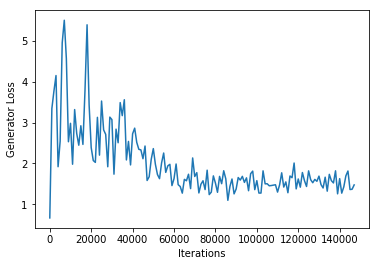

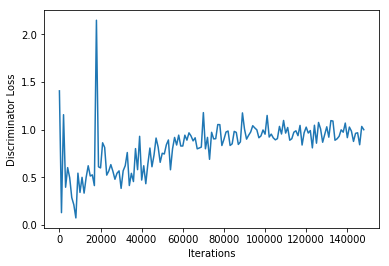

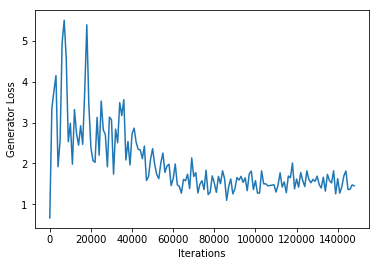

epoch 48 Discriminator loss is 1 and Generator loss is 1


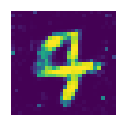

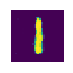

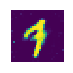

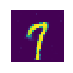

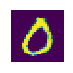

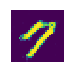

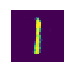

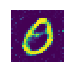

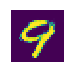

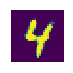

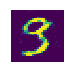

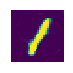

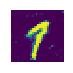

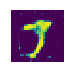

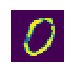

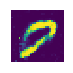

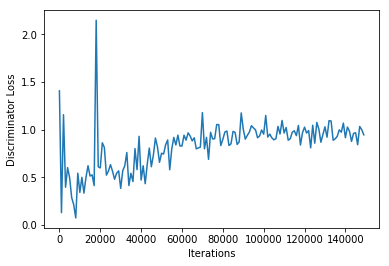

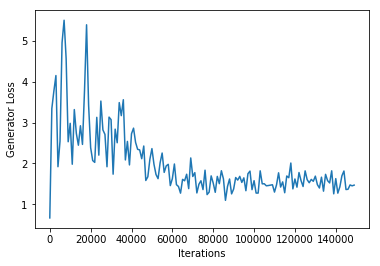

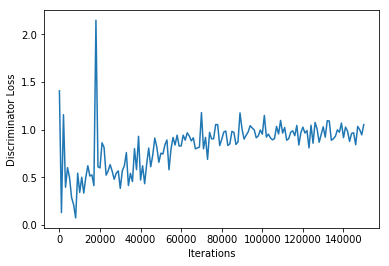

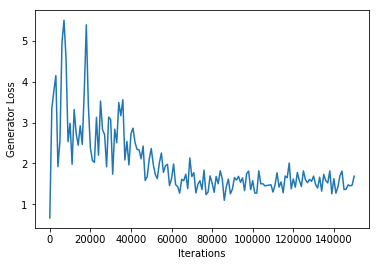

epoch 50 Discriminator loss is 0 and Generator loss is 1


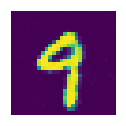

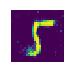

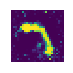

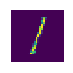

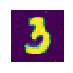

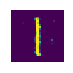

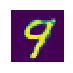

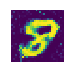

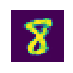

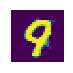

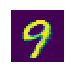

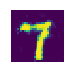

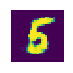

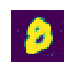

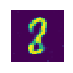

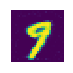

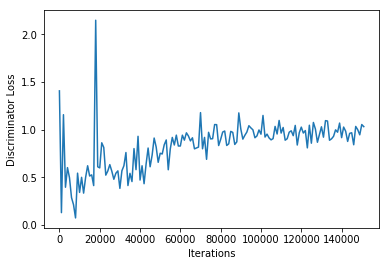

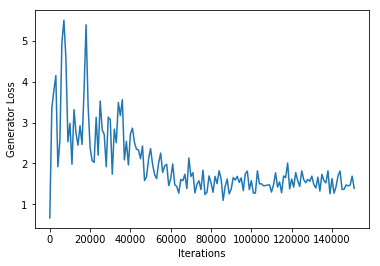

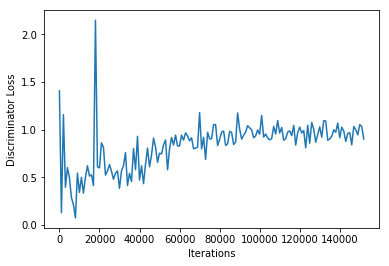

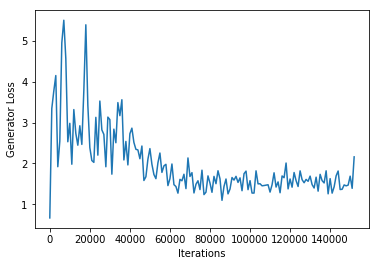

epoch 52 Discriminator loss is 1 and Generator loss is 1


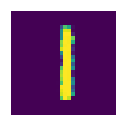

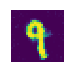

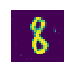

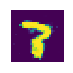

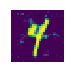

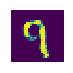

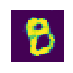

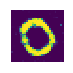

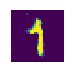

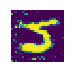

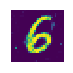

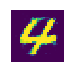

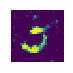

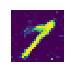

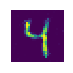

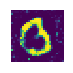

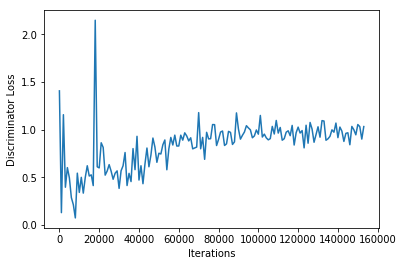

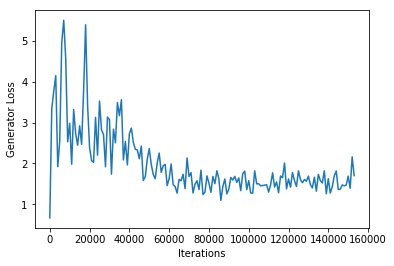

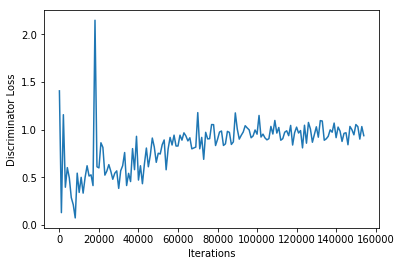

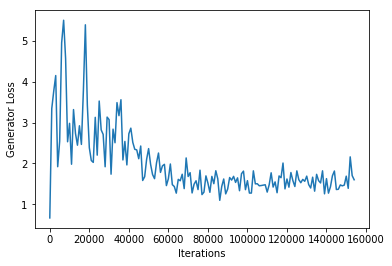

epoch 54 Discriminator loss is 1 and Generator loss is 1


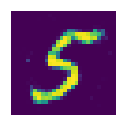

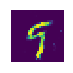

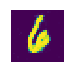

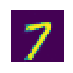

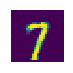

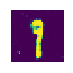

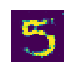

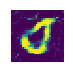

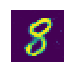

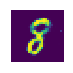

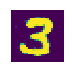

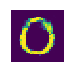

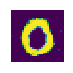

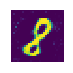

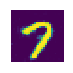

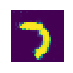

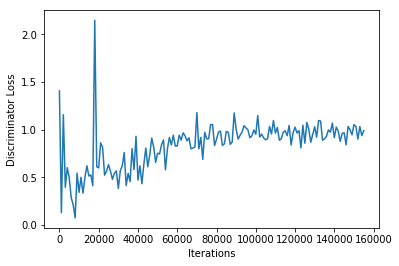

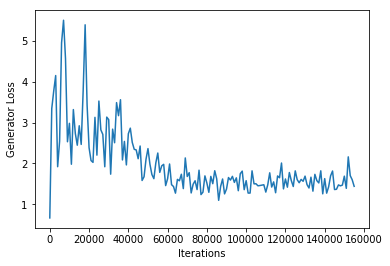

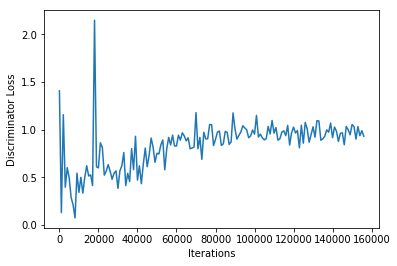

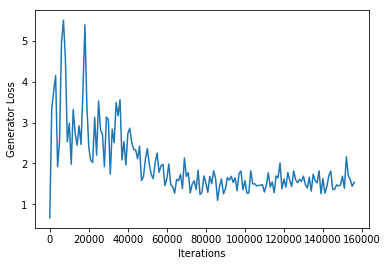

epoch 56 Discriminator loss is 0 and Generator loss is 1


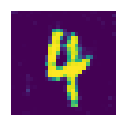

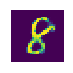

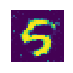

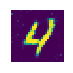

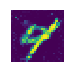

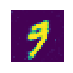

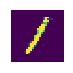

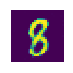

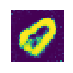

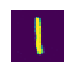

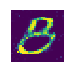

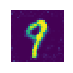

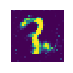

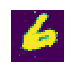

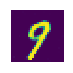

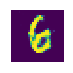

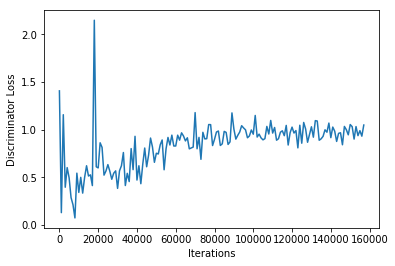

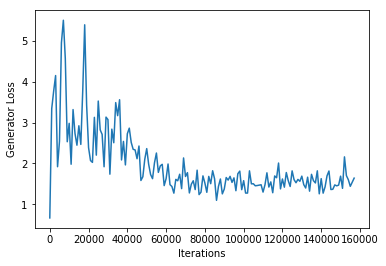

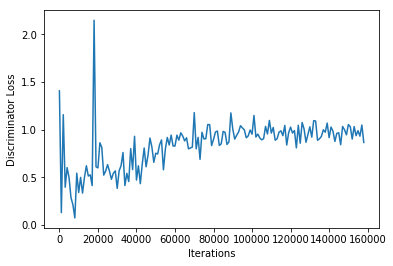

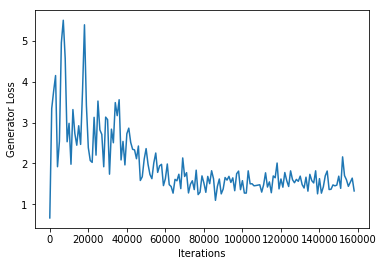

epoch 58 Discriminator loss is 1 and Generator loss is 1


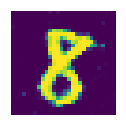

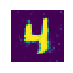

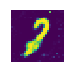

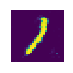

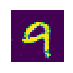

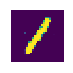

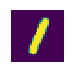

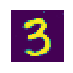

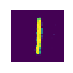

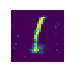

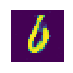

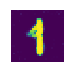

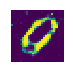

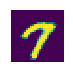

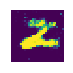

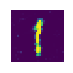

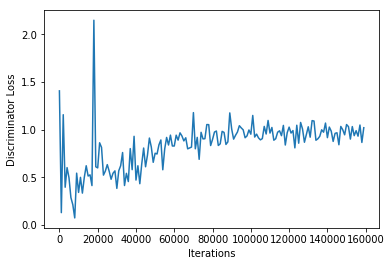

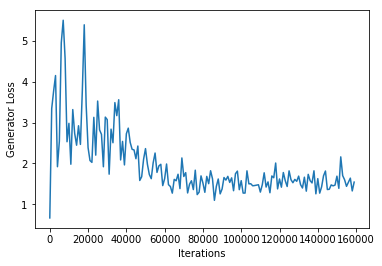

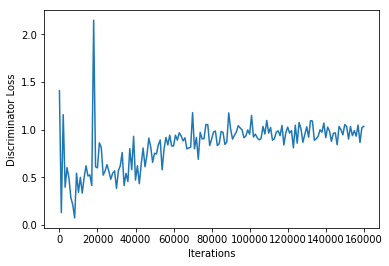

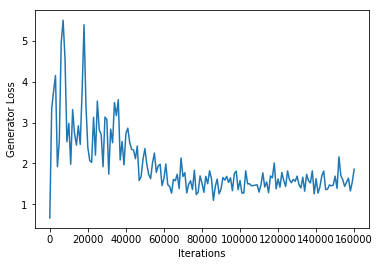

epoch 60 Discriminator loss is 0 and Generator loss is 1


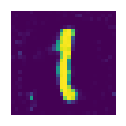

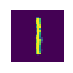

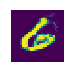

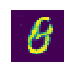

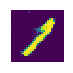

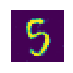

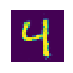

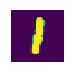

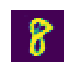

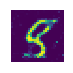

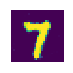

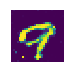

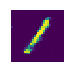

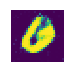

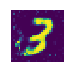

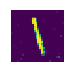

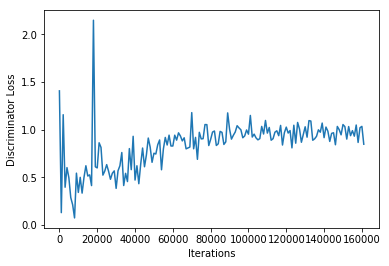

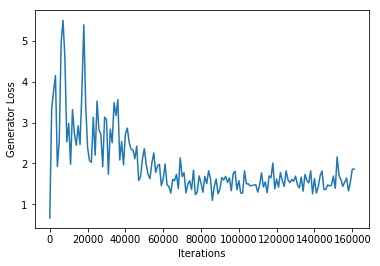

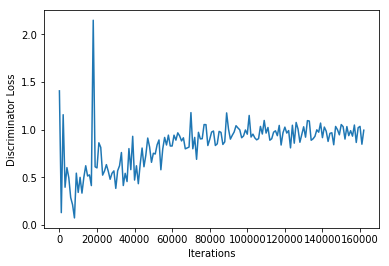

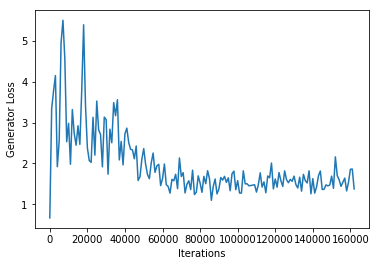

epoch 62 Discriminator loss is 1 and Generator loss is 1


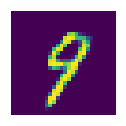

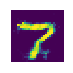

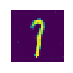

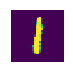

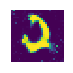

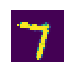

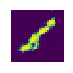

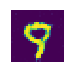

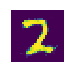

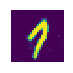

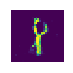

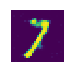

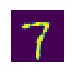

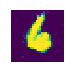

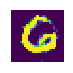

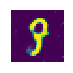

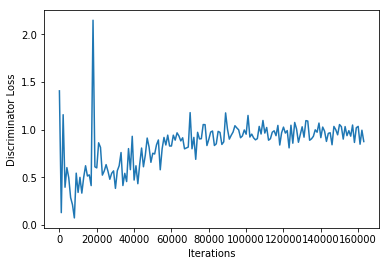

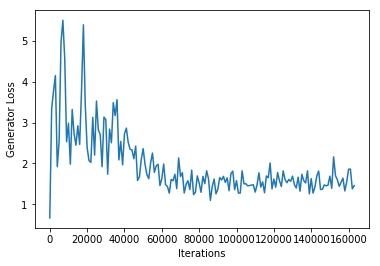

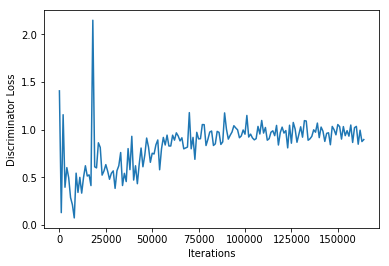

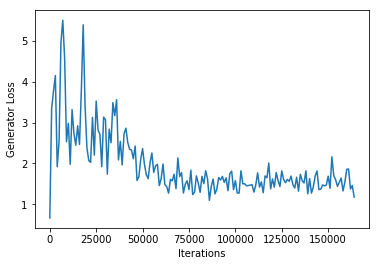

epoch 64 Discriminator loss is 1 and Generator loss is 1


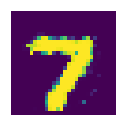

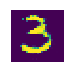

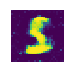

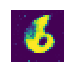

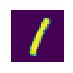

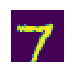

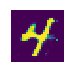

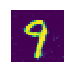

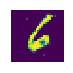

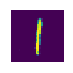

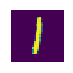

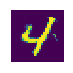

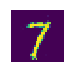

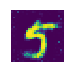

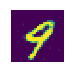

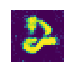

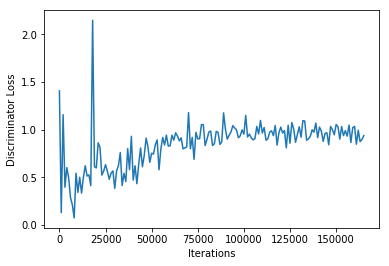

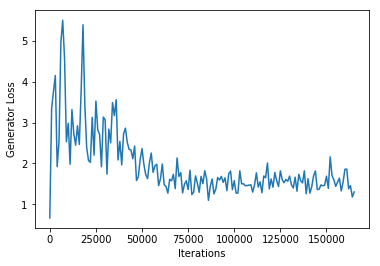

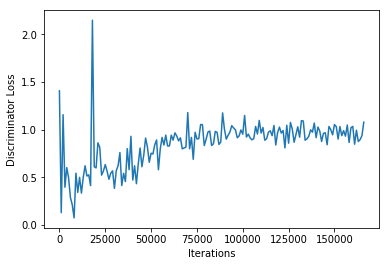

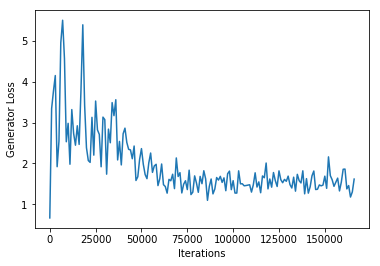

epoch 66 Discriminator loss is 0 and Generator loss is 1


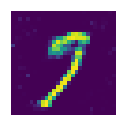

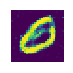

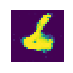

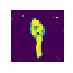

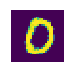

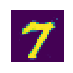

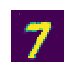

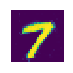

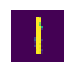

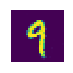

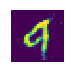

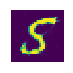

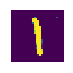

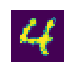

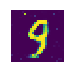

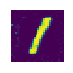

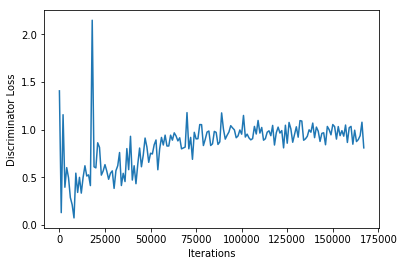

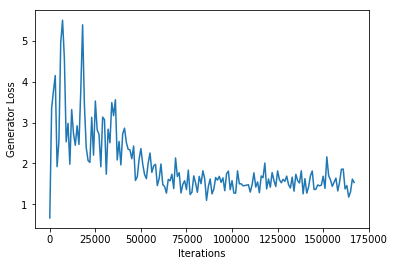

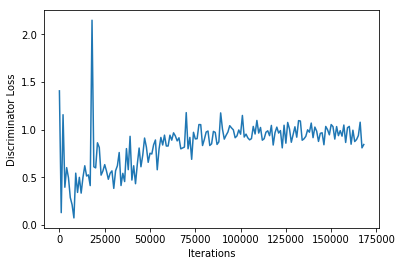

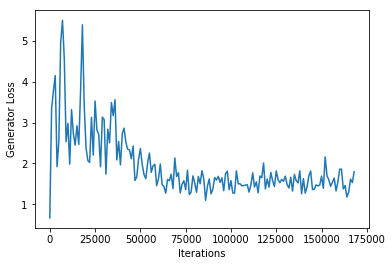

epoch 68 Discriminator loss is 1 and Generator loss is 1


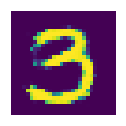

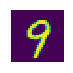

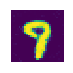

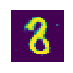

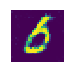

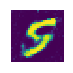

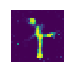

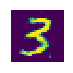

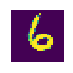

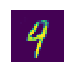

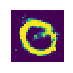

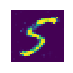

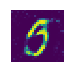

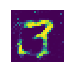

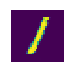

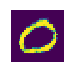

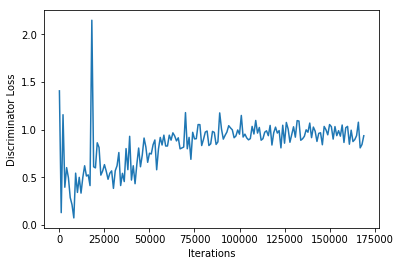

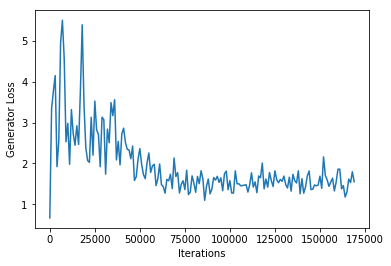

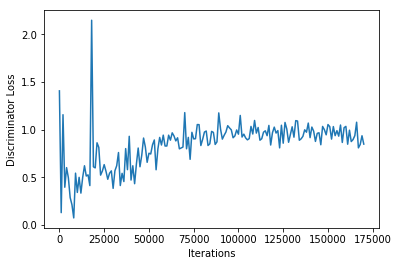

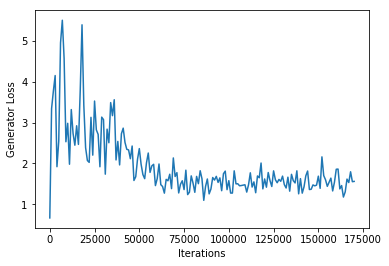

epoch 70 Discriminator loss is 0 and Generator loss is 1


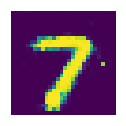

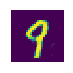

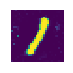

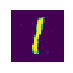

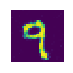

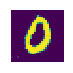

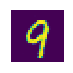

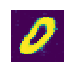

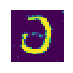

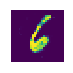

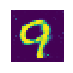

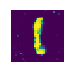

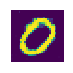

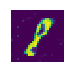

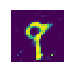

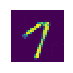

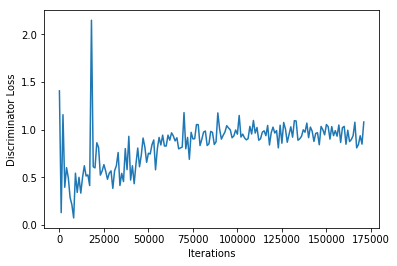

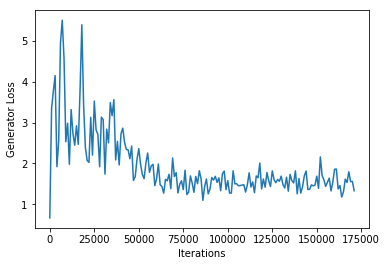

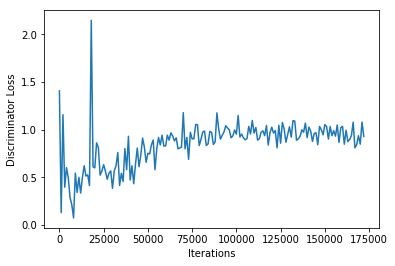

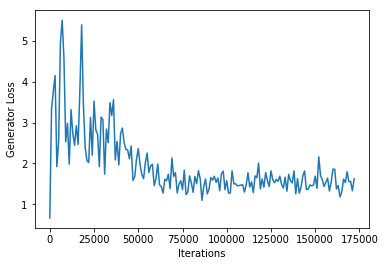

epoch 72 Discriminator loss is 0 and Generator loss is 1


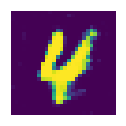

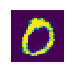

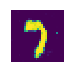

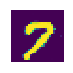

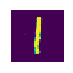

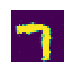

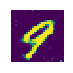

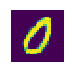

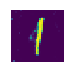

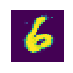

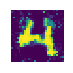

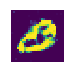

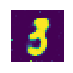

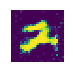

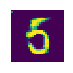

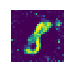

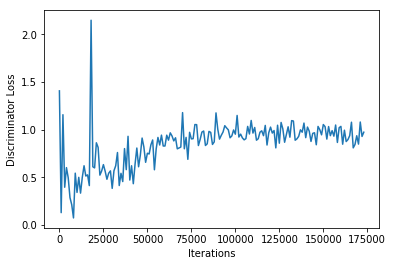

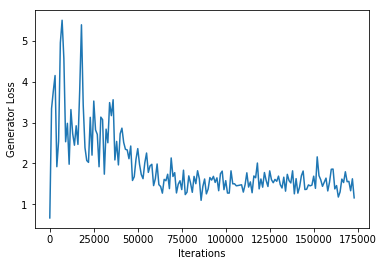

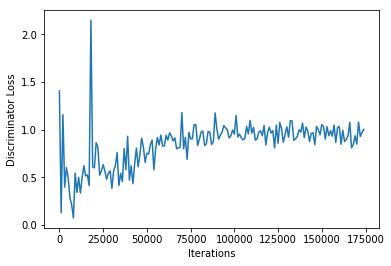

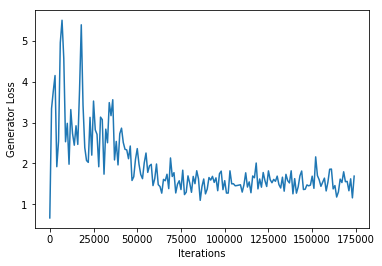

epoch 74 Discriminator loss is 1 and Generator loss is 1


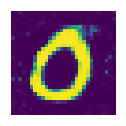

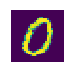

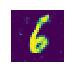

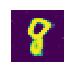

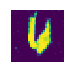

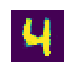

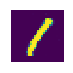

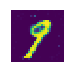

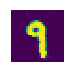

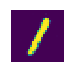

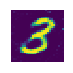

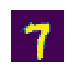

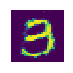

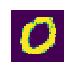

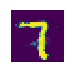

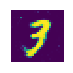

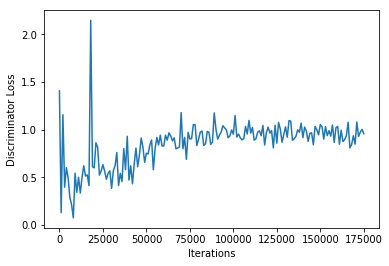

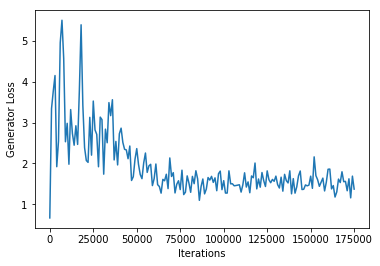

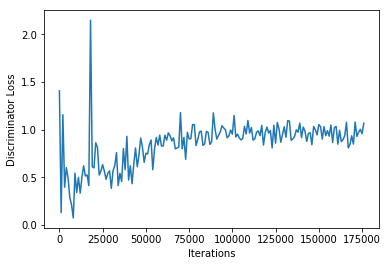

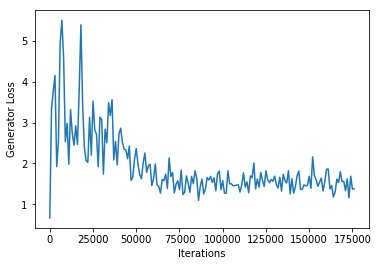

epoch 76 Discriminator loss is 0 and Generator loss is 1


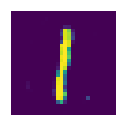

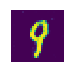

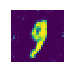

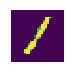

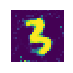

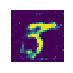

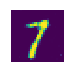

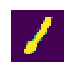

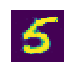

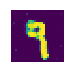

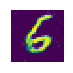

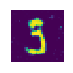

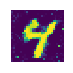

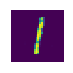

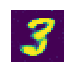

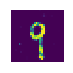

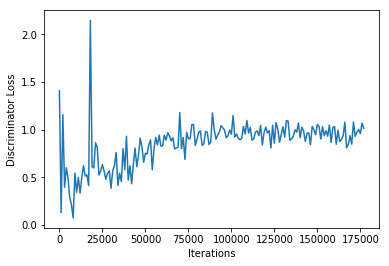

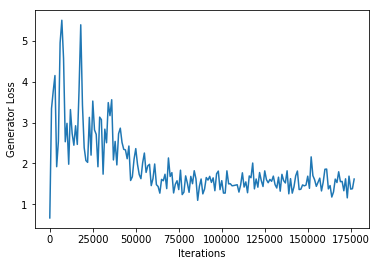

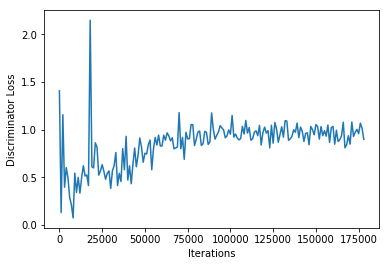

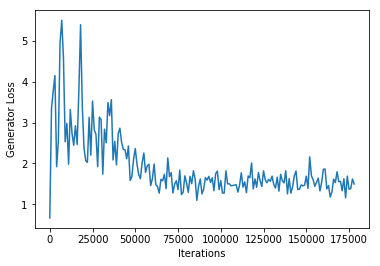

epoch 78 Discriminator loss is 0 and Generator loss is 1


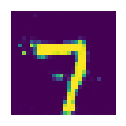

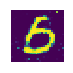

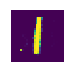

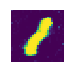

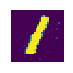

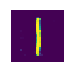

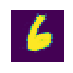

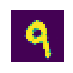

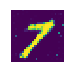

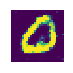

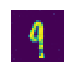

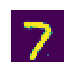

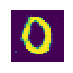

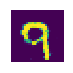

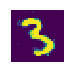

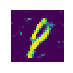

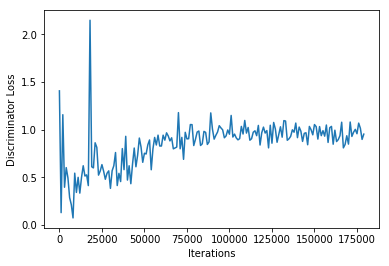

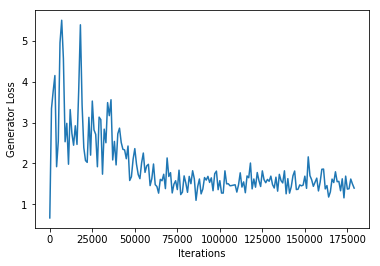

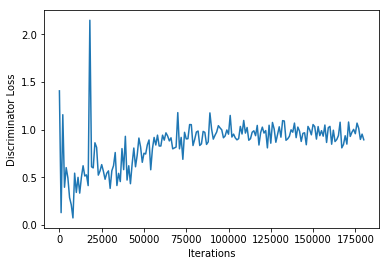

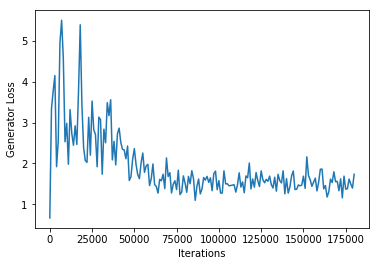

epoch 80 Discriminator loss is 0 and Generator loss is 1


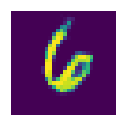

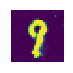

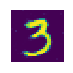

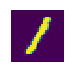

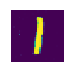

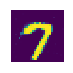

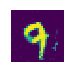

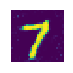

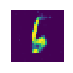

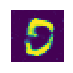

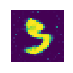

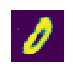

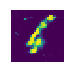

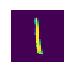

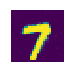

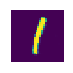

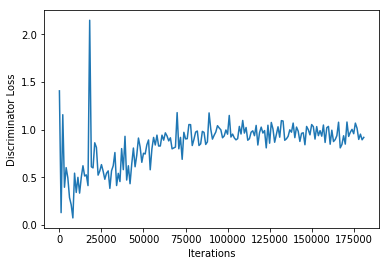

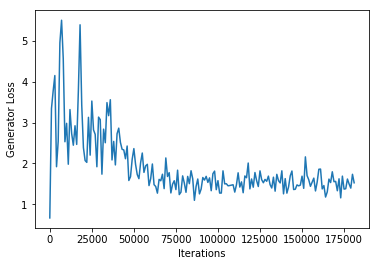

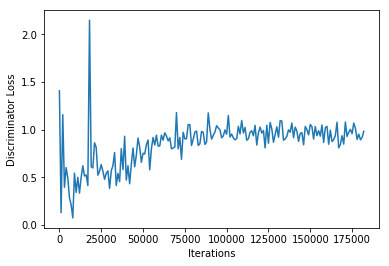

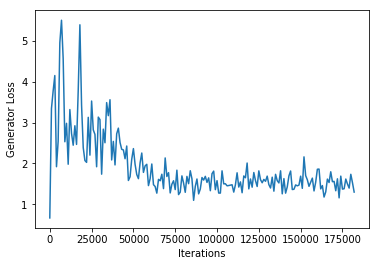

epoch 82 Discriminator loss is 0 and Generator loss is 1


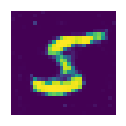

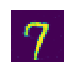

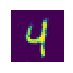

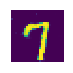

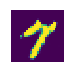

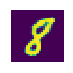

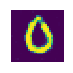

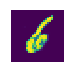

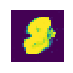

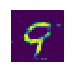

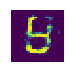

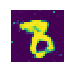

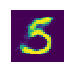

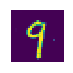

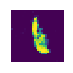

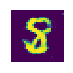

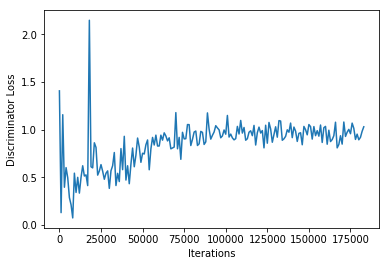

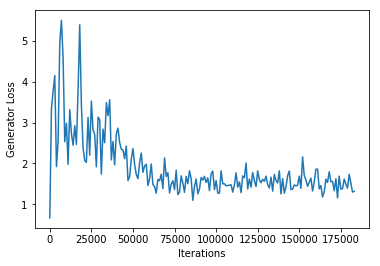

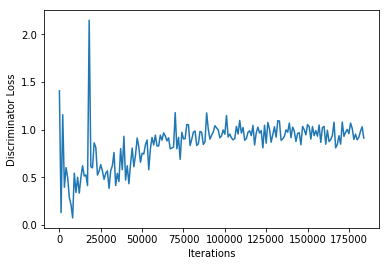

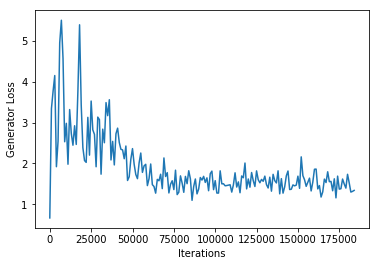

epoch 84 Discriminator loss is 0 and Generator loss is 1


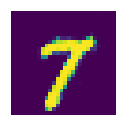

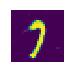

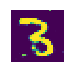

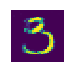

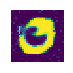

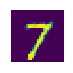

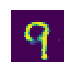

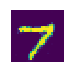

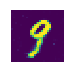

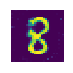

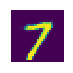

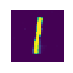

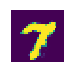

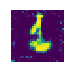

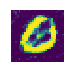

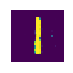

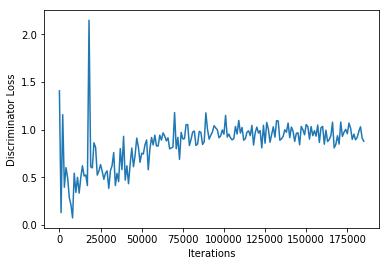

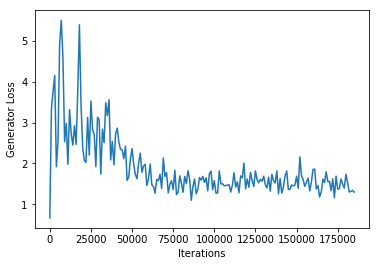

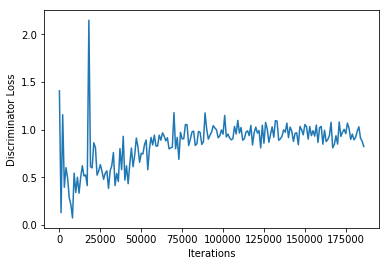

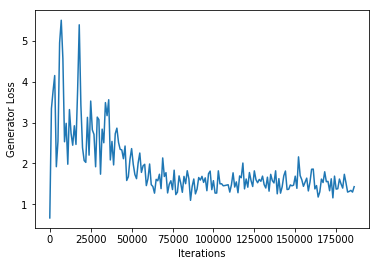

epoch 86 Discriminator loss is 1 and Generator loss is 1


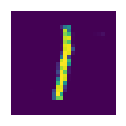

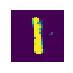

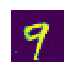

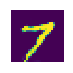

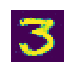

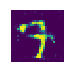

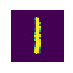

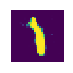

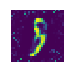

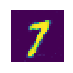

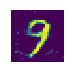

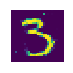

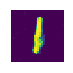

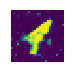

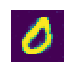

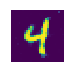

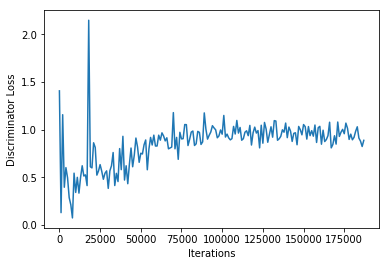

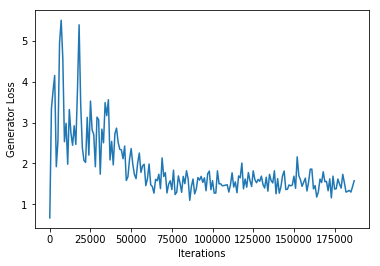

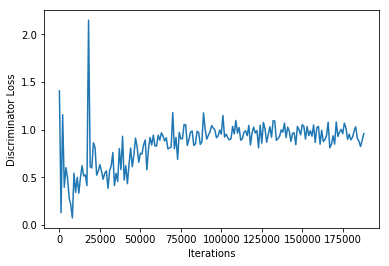

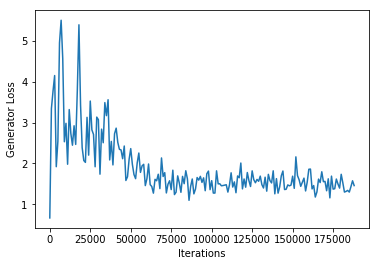

epoch 88 Discriminator loss is 0 and Generator loss is 1


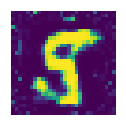

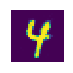

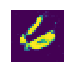

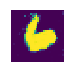

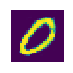

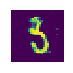

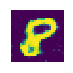

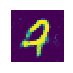

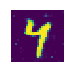

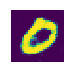

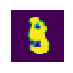

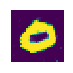

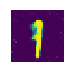

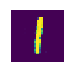

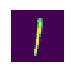

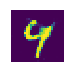

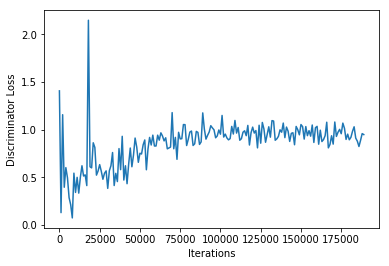

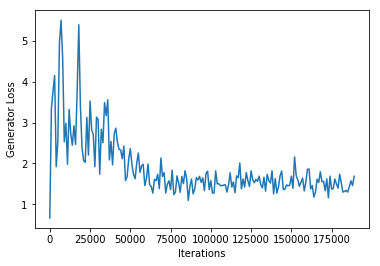

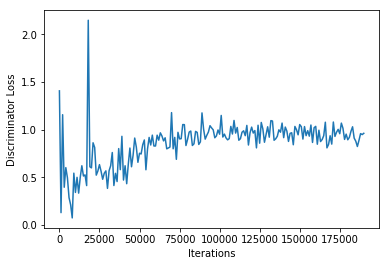

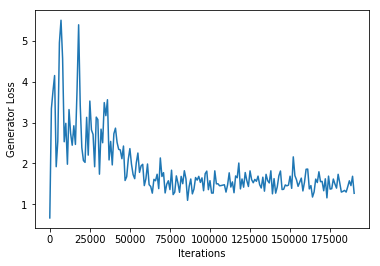

epoch 90 Discriminator loss is 0 and Generator loss is 1


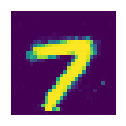

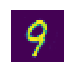

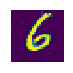

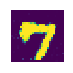

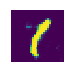

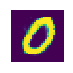

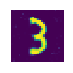

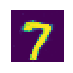

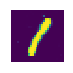

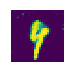

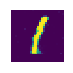

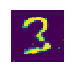

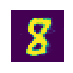

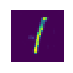

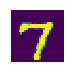

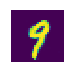

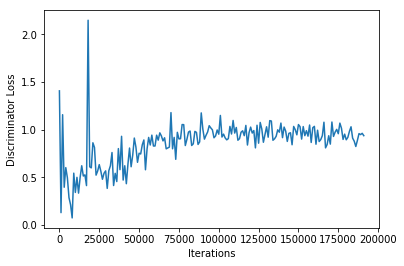

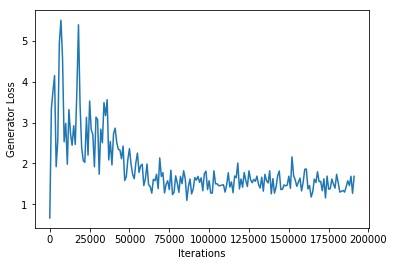

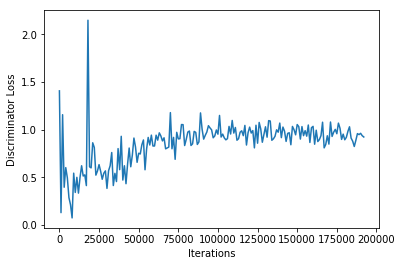

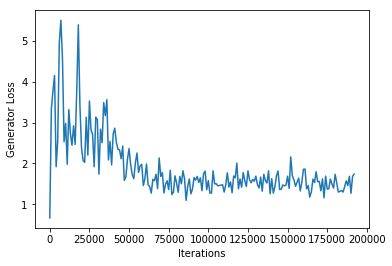

epoch 92 Discriminator loss is 0 and Generator loss is 1


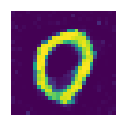

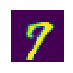

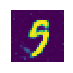

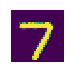

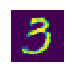

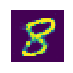

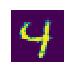

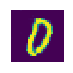

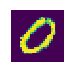

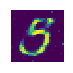

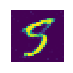

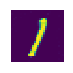

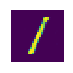

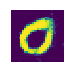

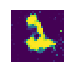

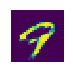

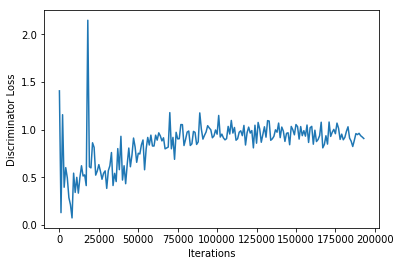

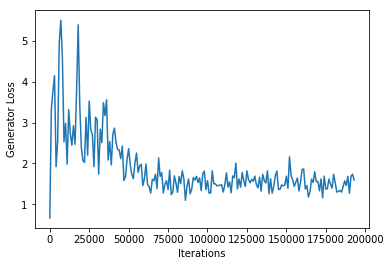

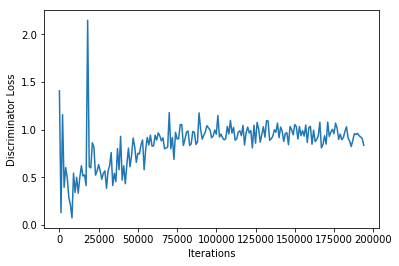

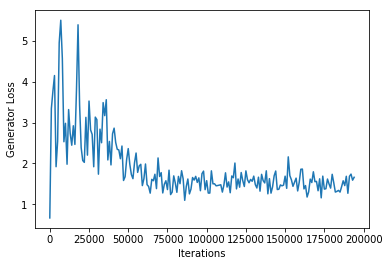

epoch 94 Discriminator loss is 0 and Generator loss is 1


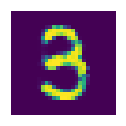

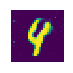

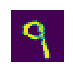

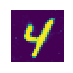

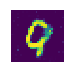

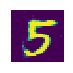

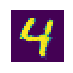

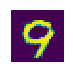

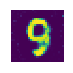

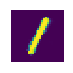

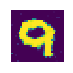

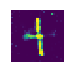

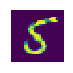

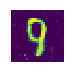

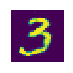

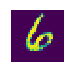

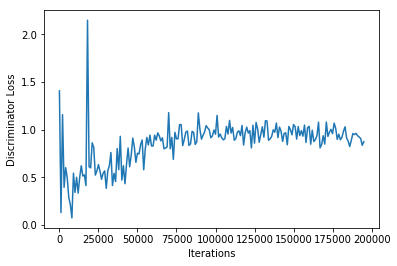

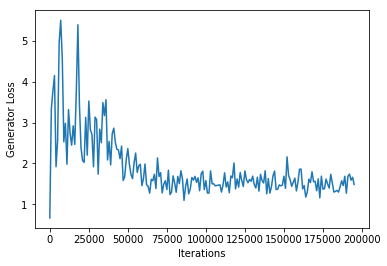

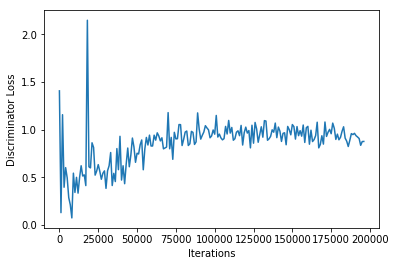

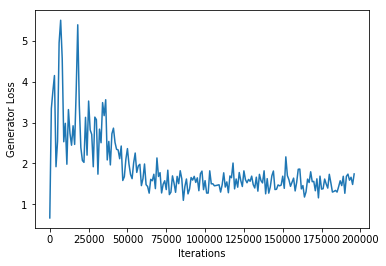

epoch 96 Discriminator loss is 0 and Generator loss is 1


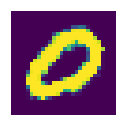

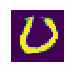

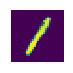

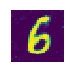

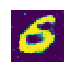

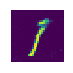

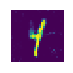

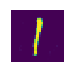

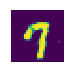

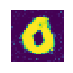

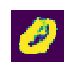

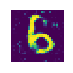

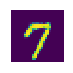

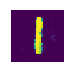

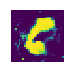

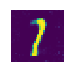

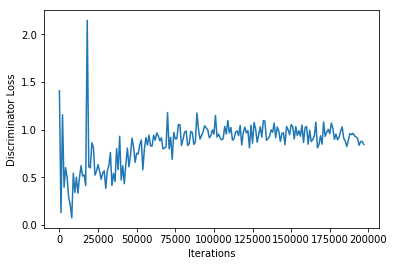

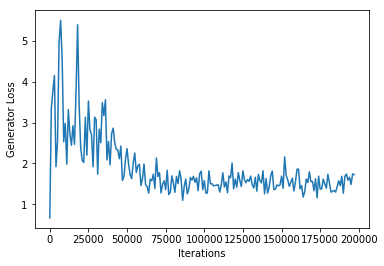

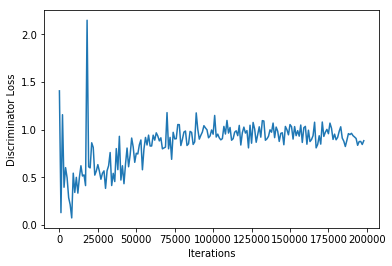

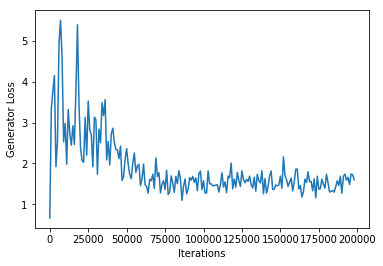

epoch 98 Discriminator loss is 0 and Generator loss is 1


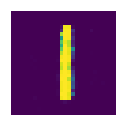

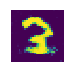

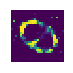

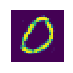

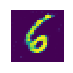

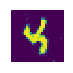

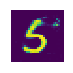

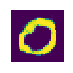

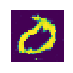

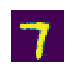

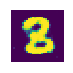

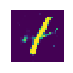

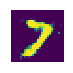

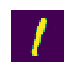

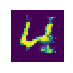

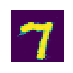

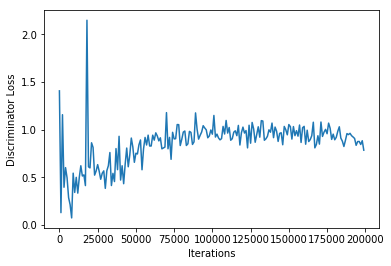

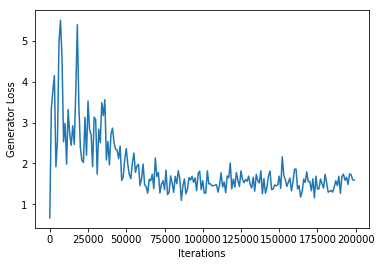

In [15]:
import numpy as np
for epoch in range(100):
    for i,data in enumerate(train_loader):
        x,_ = data 
        D.zero_grad()
        x = x.view(-1, 28 * 28)      
        mini_batch = x.size()[0]
        y_real_ = torch.ones(mini_batch)
        y_fake_ = torch.zeros(mini_batch)
        x, y_real_, y_fake_ = Variable(x.cuda()), Variable(y_real_.cuda()), Variable(y_fake_.cuda())
        D_result = D(x)
        D_real_loss = BCE_loss(D_result, y_real_)
        
        z_ = torch.randn((mini_batch, 100))
        z_ = Variable(z_.cuda())
        G_result = G(z_)

        D_result = D(G_result)
       
        D_fake_loss = BCE_loss(D_result, y_fake_)
        

        D_train_loss = D_real_loss + D_fake_loss
        
        

        D_train_loss.backward()
        D_optimizer.step()
        
         # train generator G
        G.zero_grad()

        z_ = torch.randn((mini_batch, 100))
        y_ = torch.ones(mini_batch)

        z_, y_ = Variable(z_.cuda()), Variable(y_.cuda())
        G_result = G(z_)
        D_result = D(G_result)
        G_train_loss = BCE_loss(D_result, y_)
        
        G_train_loss.backward()
        G_optimizer.step()
        
        
        if i%display_interval == 0:
            
            ed = as_np(D_train_loss.mean())
            eg = as_np(G_train_loss.mean())
        
        
            dloss.append(ed)
            gloss.append(eg)
            
            xaxis = [i*display_interval for i in range(0,(iters+1))]
          
            plt.plot(xaxis,dloss)
            plt.xlabel('Iterations')
            plt.ylabel('Discriminator Loss')
            plt.savefig(dlossimage)
            plt.show()
            plt.plot(xaxis,gloss)
            plt.xlabel('Iterations')
            
            plt.ylabel('Generator Loss')
            plt.savefig(glossimage)
            
            plt.show()
            
            iters = iters + 1
            
    if epoch%2==0:
        print 'epoch %d Discriminator loss is %d and Generator loss is %d' %(epoch, as_np(D_train_loss.mean()),as_np(G_train_loss.mean()))
        
        samples = G(z_).cpu().data.numpy()[:16]
        import matplotlib.gridspec as gridspec
        fig = plt.figure(figsize = (8,8))
        gs = gridspec.GridSpec(4,4)
        gs.update(wspace = 0.05, hspace = 0.05)

        for i,sample in enumerate(samples):
            ax= plt.subplot(gs[i])
            plt.axis('off')
            ax.set_xticklabels([])
            ax.set_yticklabels([])
            plt.imshow(np.resize(sample,(28,28)))
            plt.show()
            #pth = genimage + str(i) + '.png'
            #plt.savefig(pth)